


---


>

> GOOGLE PLAYSTORE DATA



---





REQUIRED LIBRARIES

In [ ]:
library(tidyr)
library(stringr)
library(dplyr)  
library(purrr)
library(knitr)
library(tidyverse)
library(ggplot2)
library(lubridate)

LOADING DATA

In [ ]:
gpdata <- read.csv("/content/googleplaystore.csv",na.strings = c("NaN","NA",""))
head(gpdata)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Last.Updated,CurrentVer,Android.Ver
,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
3,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
5,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
6,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up


Data overview

The Play Store apps insights can tell developers information about the Android market. Each row of the dataset has values for the category, rating, size, and more apps characteristics. Here are the columns of our dataset:



*   App - name of the application.
*   Category - category of the app

*   Rating - application’s rating on Play Store.
*   Reviews - number of the app’s reviews.


*   Size - size of the app.
*   Install - number of installs of the app.

*   Type - whether the app is free or paid
*  Price - price of the app (0 if free).


*   Content Rating - target audience of the app.
*   Genres - genre the app belongs to.


*   Last Updated - date the app was last updated.
*   Current Ver - current version of the application.

*   Android Ver - minimum Android version required to run the app.

















CLEANING DATA

In [ ]:
data.clean <- gpdata %>%
  mutate(
    # Eliminate some characters to transform Installs to numeric
    Installs = gsub("\\+", "", as.character(Installs)),
    Installs = as.numeric(gsub(",", "", Installs)),
    # Eliminate M to transform Size to numeric
    Size = gsub("M", "", Size),
    # Replace cells with k to 0 since it is < 1MB
    Size = ifelse(grepl("k", Size), 0, as.numeric(Size)),
    # Transform reviews to numeric
    Reviews = as.numeric(Reviews),
   
    # Remove currency symbol from Price, change it to numeric
    Price = as.numeric(gsub("\\$", "", as.character(Price))),
    # Last Updated to date format
    Last.Updated = mdy(Last.Updated),
    # Replace "Varies with device" to NA since it is unknown
    Min.Android.Ver = gsub("Varies with device", NA, Android.Ver),
    # Keep only version number to 1 decimal
    Min.Android.Ver = as.numeric(substr(Min.Android.Ver, start = 1, stop = 3)),
    # Drop old Android version column
    Android.Ver = NULL
  ) %>%
  filter(
    # Two apps had type as 0 or NA, they will be removed 
    Type %in% c("Free", "Paid")
  )

str(data.clean)

Warning message in ifelse(grepl("k", Size), 0, as.numeric(Size)):
“NAs introduced by coercion”
Warning message:
“All formats failed to parse. No formats found.”


'data.frame':	10839 obs. of  13 variables:
 $ App            : chr  "Photo Editor & Candy Camera & Grid & ScrapBook" "Coloring book moana" "U Launcher Lite – FREE Live Cool Themes, Hide Apps" "Sketch - Draw & Paint" ...
 $ Category       : chr  "ART_AND_DESIGN" "ART_AND_DESIGN" "ART_AND_DESIGN" "ART_AND_DESIGN" ...
 $ Rating         : num  4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.1 4.4 4.7 ...
 $ Reviews        : num  159 967 87510 215644 967 ...
 $ Size           : num  19 14 8.7 25 2.8 5.6 19 29 33 3.1 ...
 $ Installs       : num  1e+04 5e+05 5e+06 5e+07 1e+05 5e+04 5e+04 1e+06 1e+06 1e+04 ...
 $ Type           : chr  "Free" "Free" "Free" "Free" ...
 $ Price          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ContentRating  : chr  "Everyone" "Everyone" "Everyone" "Teen" ...
 $ Genres         : chr  "Art & Design" "Art & Design;Pretend Play" "Art & Design" "Art & Design" ...
 $ Last.Updated   : Date, format: NA NA ...
 $ CurrentVer     : chr  "1.0.0" "2.0.0" "1.2.4" "Varies with device" ...
 $ Min.Androi

In [ ]:
gpdata <- gpdata[,-c(11,12,13)]

In [ ]:
gpdata <- unique(gpdata)
dim(gpdata)

[1] 10355    10

In [ ]:
gpdata$App = as.character(gpdata$App)
gpdata$Category = as.character(gpdata$Category)
gpdata$Type = as.character(gpdata$Type)
gpdata$ContentRating = as.character(gpdata$ContentRating)
gpdata$Genres = as.character(gpdata$Genres)
gpdata$Rating = as.numeric(gpdata$Rating)
gpdata$Reviews <- as.numeric(gpdata$Reviews)
str(gpdata)

'data.frame':	10355 obs. of  10 variables:
 $ App          : chr  "Photo Editor & Candy Camera & Grid & ScrapBook" "Coloring book moana" "U Launcher Lite – FREE Live Cool Themes, Hide Apps" "Sketch - Draw & Paint" ...
 $ Category     : chr  "ART_AND_DESIGN" "ART_AND_DESIGN" "ART_AND_DESIGN" "ART_AND_DESIGN" ...
 $ Rating       : num  4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.1 4.4 4.7 ...
 $ Reviews      : num  159 967 87510 215644 967 ...
 $ Size         : chr  "19M" "14M" "8.7M" "25M" ...
 $ Installs     : chr  "10,000+" "500,000+" "5,000,000+" "50,000,000+" ...
 $ Type         : chr  "Free" "Free" "Free" "Free" ...
 $ Price        : chr  "0" "0" "0" "0" ...
 $ ContentRating: chr  "Everyone" "Everyone" "Everyone" "Teen" ...
 $ Genres       : chr  "Art & Design" "Art & Design;Pretend Play" "Art & Design" "Art & Design" ...


In [ ]:
gpdata$Size <-  str_replace_all(gpdata$Size, "M", "")
gpdata$Size <- ifelse(grepl( "k", gpdata$Size), as.numeric(gpdata$Size)/1000, gpdata$Size)
str(gpdata$Size)

Warning message in ifelse(grepl("k", gpdata$Size), as.numeric(gpdata$Size)/1000, :
“NAs introduced by coercion”


 chr [1:10355] "19" "14" "8.7" "25" "2.8" "5.6" "19" "29" "33" "3.1" "28" ...


In [ ]:
gpdata$Installs <- str_replace_all(gpdata$Installs,"\\+","")
gpdata$Installs <- str_replace_all(gpdata$Installs,"\\,","")
gpdata$Installs <- as.integer(gpdata$Installs)

In [ ]:
gpdata <- na.omit(gpdata)
sum(is.na(gpdata))

[1] 0

In [ ]:
glimpse(gpdata)

Rows: 8,633
Columns: 10
$ App           <chr> "Photo Editor & Candy Camera & Grid & ScrapBook", "Color…
$ Category      <chr> "ART_AND_DESIGN", "ART_AND_DESIGN", "ART_AND_DESIGN", "A…
$ Rating        <dbl> 4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.1, 4.4, 4.7, 4.4, 4…
$ Reviews       <dbl> 159, 967, 87510, 215644, 967, 167, 178, 36815, 13791, 12…
$ Size          <chr> "19", "14", "8.7", "25", "2.8", "5.6", "19", "29", "33",…
$ Installs      <int> 10000, 500000, 5000000, 50000000, 100000, 50000, 50000, …
$ Type          <chr> "Free", "Free", "Free", "Free", "Free", "Free", "Free", …
$ Price         <chr> "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "…
$ ContentRating <chr> "Everyone", "Everyone", "Everyone", "Teen", "Everyone", …
$ Genres        <chr> "Art & Design", "Art & Design;Pretend Play", "Art & Desi…


In [ ]:
kable (gpdata[1:10,], caption = "Clean Data")



Table: Clean Data

|App                                                |Category       | Rating| Reviews|Size | Installs|Type |Price |ContentRating |Genres                    |
|:--------------------------------------------------|:--------------|------:|-------:|:----|--------:|:----|:-----|:-------------|:-------------------------|
|Photo Editor & Candy Camera & Grid & ScrapBook     |ART_AND_DESIGN |    4.1|     159|19   |    1e+04|Free |0     |Everyone      |Art & Design              |
|Coloring book moana                                |ART_AND_DESIGN |    3.9|     967|14   |    5e+05|Free |0     |Everyone      |Art & Design;Pretend Play |
|U Launcher Lite – FREE Live Cool Themes, Hide Apps |ART_AND_DESIGN |    4.7|   87510|8.7  |    5e+06|Free |0     |Everyone      |Art & Design              |
|Sketch - Draw & Paint                              |ART_AND_DESIGN |    4.5|  215644|25   |    5e+07|Free |0     |Teen          |Art & Design              |
|Pixel Draw - Number Art Colori

DATA VIZUALIZATION

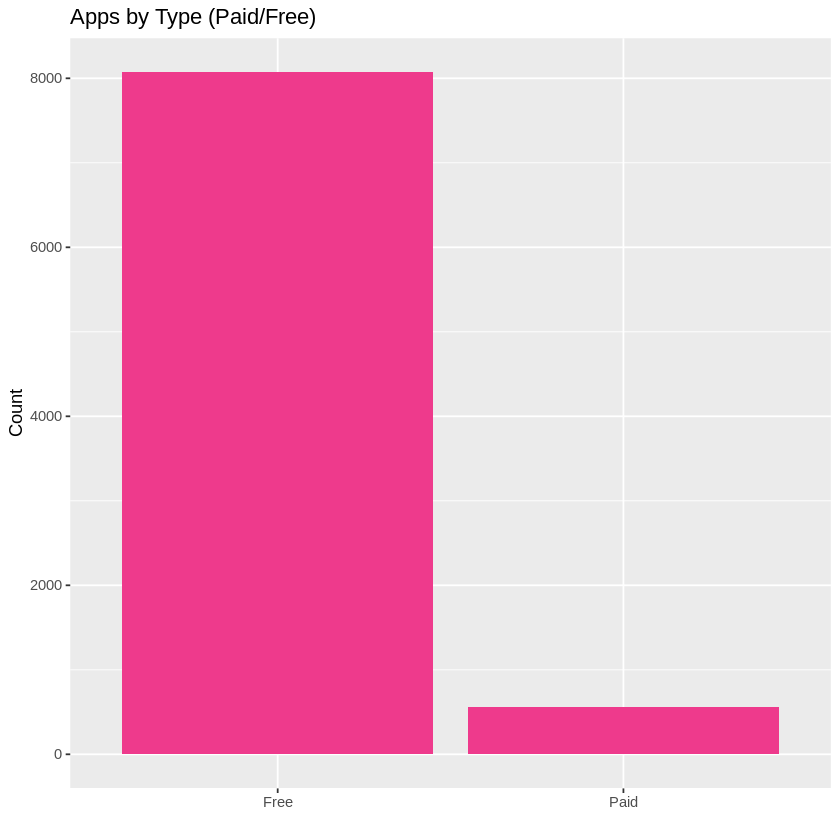

In [ ]:
gpdata%>%
  ggplot(aes(Type)) + 
  geom_bar(fill = 'violetred2') +
  labs(title = "Apps by Type (Paid/Free)", 
       x = "", 
       y = "Count")

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


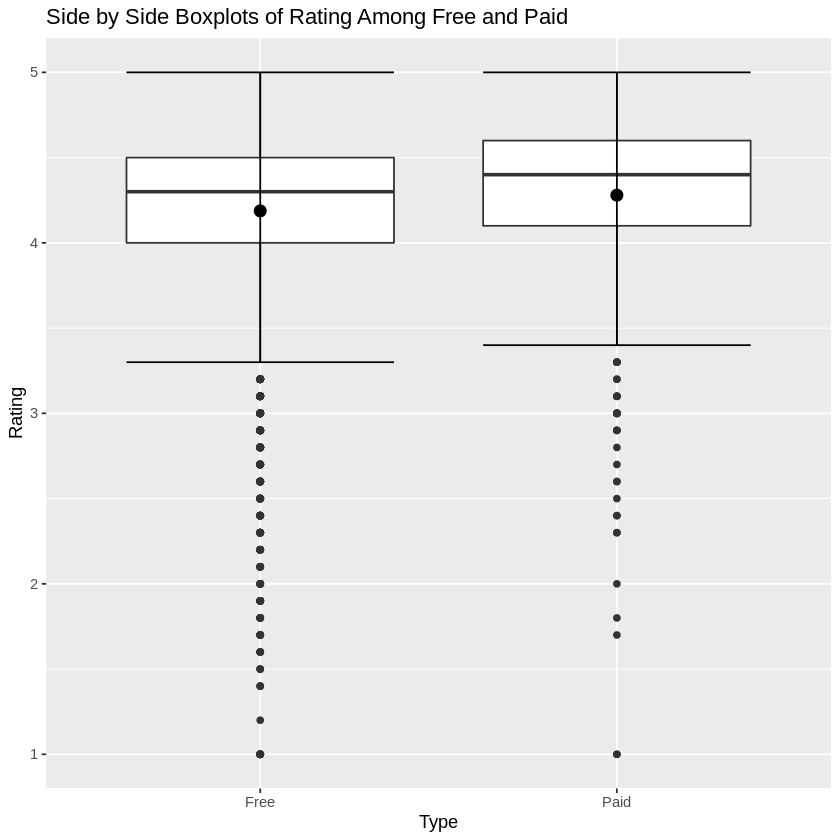

In [ ]:
ggplot(data = gpdata, aes(x = Type, y = Rating)) +
  geom_boxplot() +
  stat_boxplot(geom = "errorbar") +
  stat_summary(fun.y = mean, col = "black", geom = "point", size = 3) +
  ggtitle("Side by Side Boxplots of Rating Among Free and Paid")

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


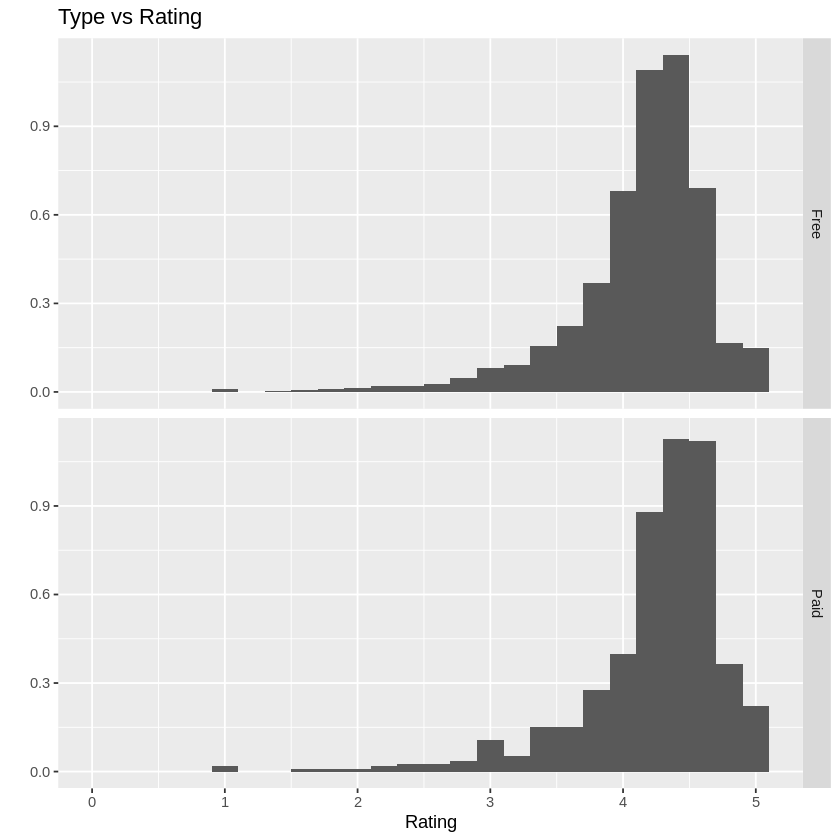

In [ ]:
gpdata %>%
  ggplot(aes(Rating))+
  geom_histogram(binwidth = .2, aes(y=..density..))+
  scale_x_continuous(limits = c(0, 5.1))+
  labs(title = "Type vs Rating",
       x = "Rating", 
       y = "")+
  facet_grid(Type~.)


Warning message:
“Removed 1500 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 5891 rows containing missing values (geom_point).”


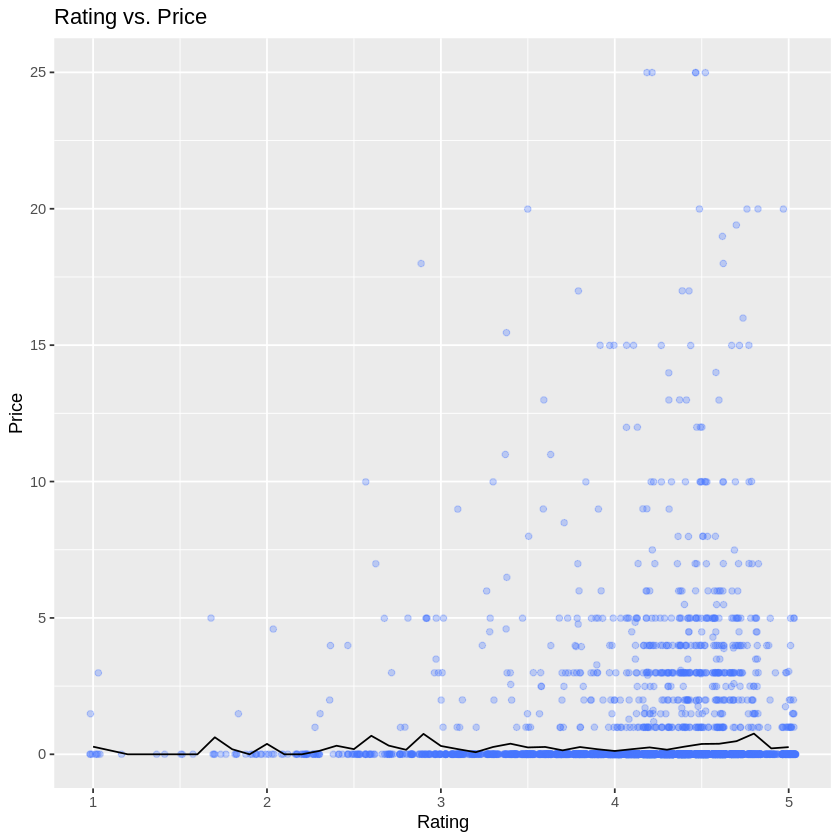

In [ ]:

ggplot(data.clean,aes(x = Rating , y = Price))+
  geom_jitter(alpha = 0.3, color = 'royalblue1')+
  ylim(0,25)+
  geom_line(stat = 'summary', fun= mean)+
  ggtitle('Rating vs. Price')

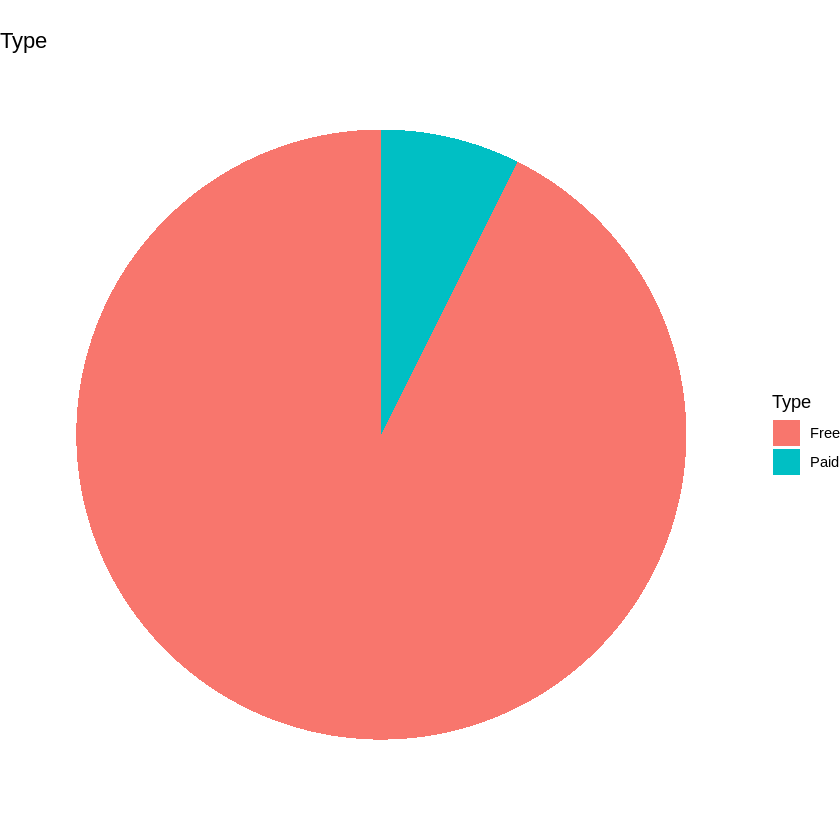

In [ ]:
df_type = subset(data.clean, (Type == 'Free' | Type == 'Paid'))

temp <- df_type%>%
  group_by(Type)%>%
  summarise(n = n())


ggplot(aes(x = '', y = n, fill = Type), data = temp )+
  geom_bar(stat = 'identity')+
  coord_polar('y', start = 0)+
  theme_void()+
  ggtitle('Type')

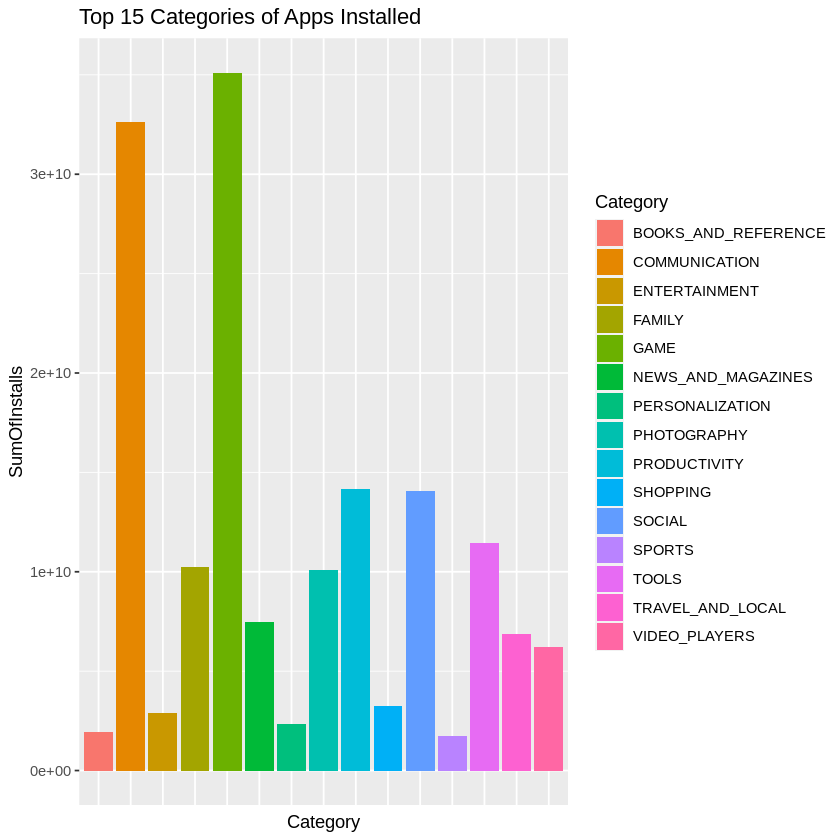

In [ ]:
data.clean %>% 
  group_by(Category) %>%
  summarize(SumOfInstalls = sum(Installs)) %>%
  arrange(desc(SumOfInstalls)) %>%
  head(15) %>%
  ggplot(aes(x = Category, y = SumOfInstalls, fill = Category)) +
  geom_bar(stat="identity") +
  labs(title= "Top 15 Categories of Apps Installed" ) +
  theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

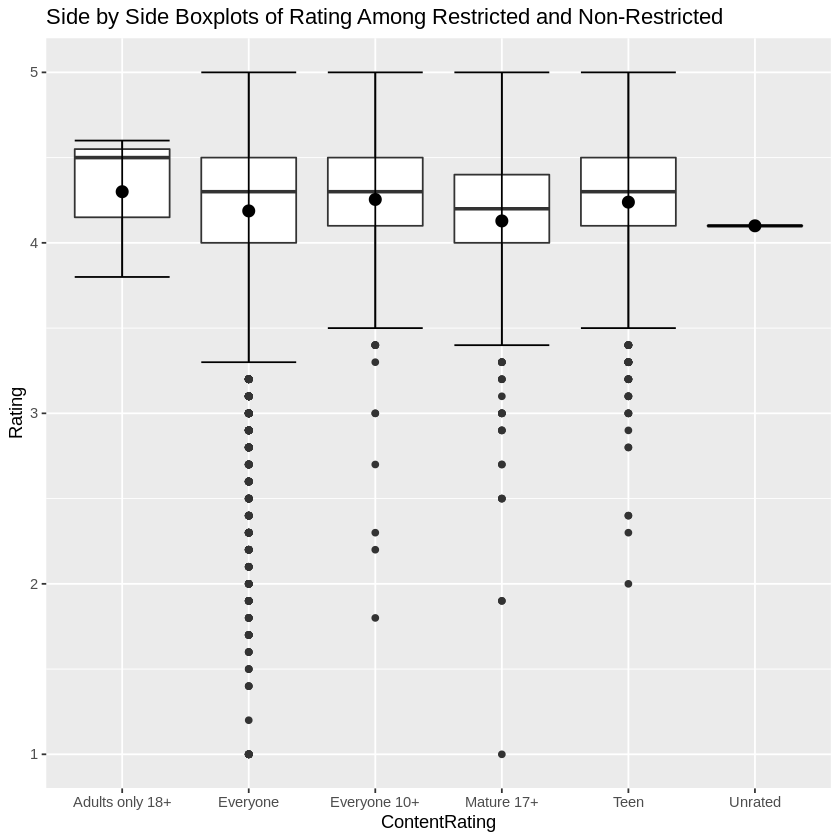

In [ ]:
ggplot(data = gpdata, aes(x = ContentRating, y = Rating)) +
  geom_boxplot() +
  stat_boxplot(geom = "errorbar") +
  stat_summary(fun= mean, col = "black", geom = "point", size = 3) +
  ggtitle("Side by Side Boxplots of Rating Among Restricted and Non-Restricted")

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Removed 8633 row(s) containing missing values (geom_path).”


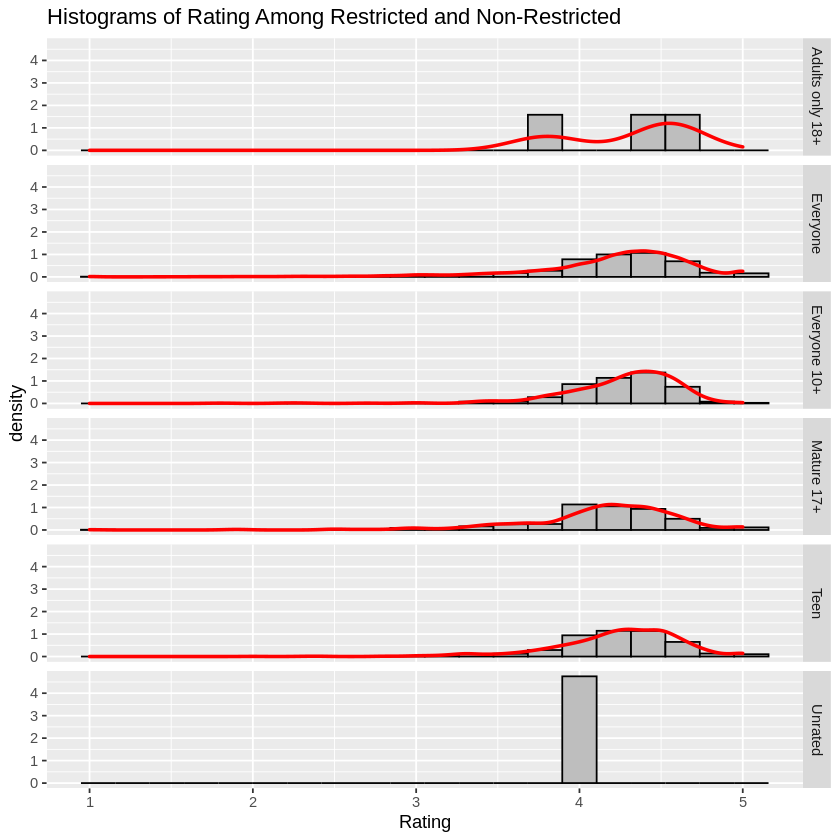

In [ ]:
xbar <- tapply(gpdata$Rating, gpdata$ContentRating, mean)
s <- tapply(gpdata$Rating, gpdata$ContentRating, sd)
gpdata$normal.density <- apply(gpdata, 1, function(x){
  dnorm(as.numeric(x["Rating"]),
        xbar[x["Content Rating"]], s[x["Content Rating"]])})
ggplot(gpdata, aes(x = Rating)) +
  geom_histogram(aes(y = ..density..), 
                 # bins = sqrt(nrow(bike)) + 2,
                 bins = 20,
                 fill = "grey", col = "black") +
  facet_grid(ContentRating ~ .) +
  geom_density(col = "red", lwd = 1) +
  geom_line(aes(y = normal.density), col = "blue", lwd = 1) +
  ggtitle("Histograms of Rating Among Restricted and Non-Restricted")

`geom_smooth()` using formula 'y ~ x'



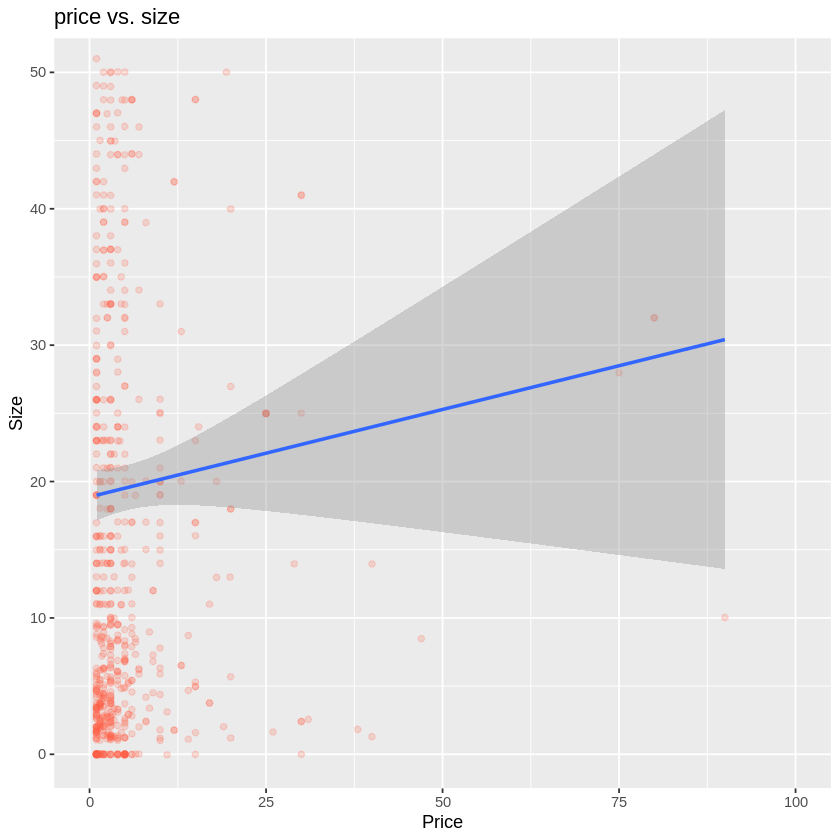

In [ ]:
df_size = subset(data.clean, Size != 'Varies with device')
temp2 <- subset(df_size, Type == 'Paid' & Price <100)
ggplot(aes(x = Price, y = Size), data = temp2)+
  geom_jitter(alpha = 0.2, color = 'tomato')+
  geom_smooth(method = 'lm')+
  xlim(0,100)+
  coord_cartesian(ylim = c(0,50))+
  ggtitle('price vs. size')

`geom_smooth()` using formula 'y ~ x'



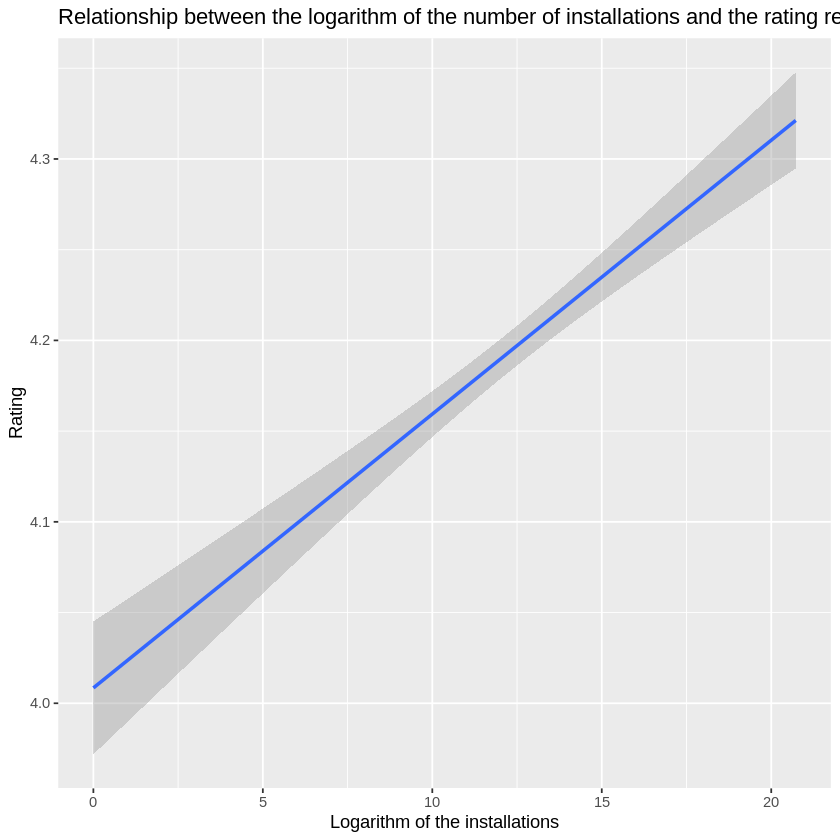

In [ ]:
gpdata %>% filter(!is.na(Rating), !is.na(Installs)) %>% 
ggplot(mapping = aes(x = log(Installs), y = Rating)) + geom_smooth(method = "lm") +
xlab("Logarithm of the installations") + 
ggtitle("Relationship between the logarithm of the number of installations and the rating received")

`geom_smooth()` using formula 'y ~ x'



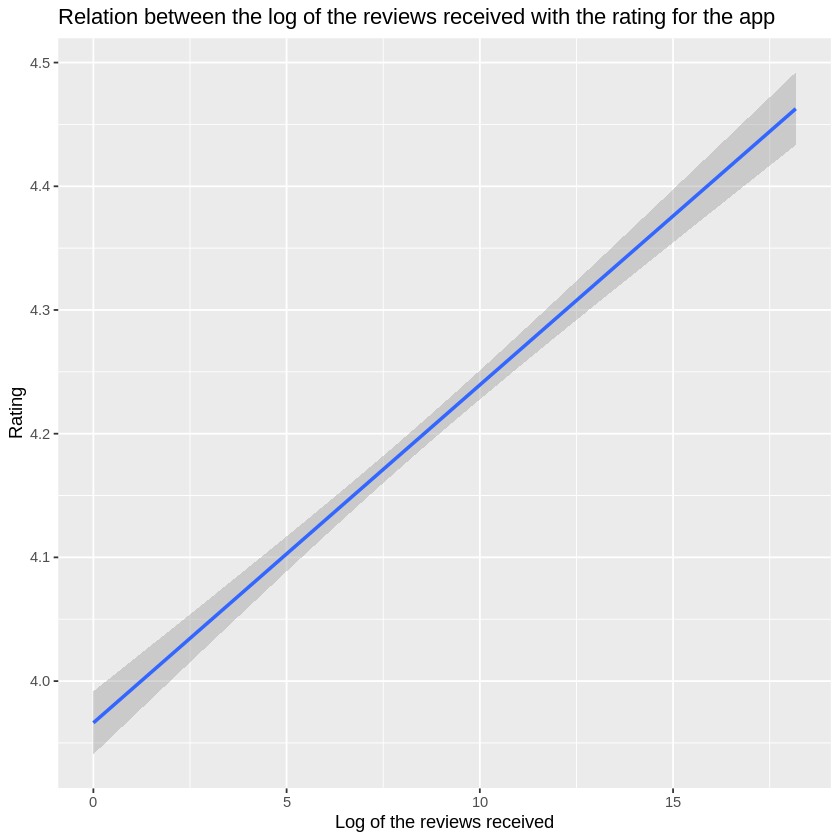

In [ ]:
gpdata$Reviews <- as.numeric(gpdata$Reviews)
gpdata %>% filter(!is.na(log(Reviews))) %>% 
ggplot(mapping = aes(x = log(Reviews), y = Rating)) + geom_smooth(method = "lm") + 
ggtitle("Relation between the log of the reviews received with the rating for the app") + 
xlab("Log of the reviews received")

In [ ]:
temp <-data.clean%>%
  group_by( Min.Android.Ver)%>%
  summarise(n = n())

#Android.Ver level with more than 10 apps having that level
ver_df<-subset(temp, ( Min.Android.Ver!= 'NaN' & n >10))

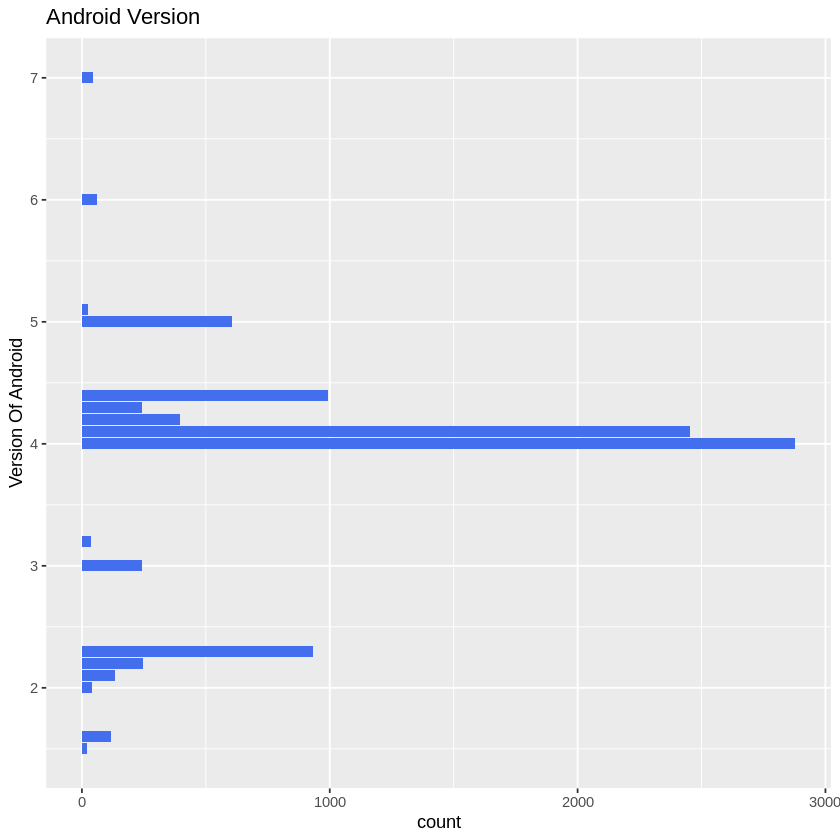

In [ ]:
ggplot(aes(x = Min.Android.Ver, y = n), data = ver_df)+
geom_bar(stat = 'identity', fill = 'royalblue2')+
coord_flip()+
ylab('count')+
xlab('Version Of Android')+
ggtitle('Android Version')

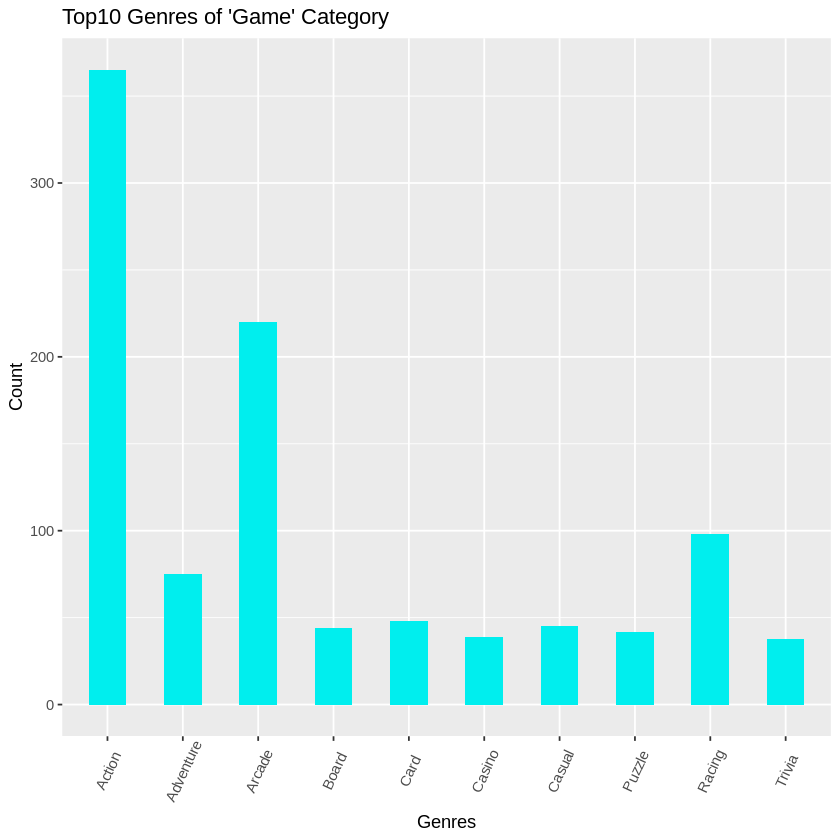

In [ ]:
data.clean %>%
  filter(Category == "GAME") %>%
  group_by(Genres) %>%
  summarise(Count = n()) %>%
  arrange(desc(Count)) %>%
  head(10) %>%
  ggplot(aes(x = Genres, y = Count)) +
  geom_bar(stat="identity", width=.5,  fill="cyan2") +
  labs(title= "Top10 Genres of 'Game' Category" ) +
  theme(axis.text.x = element_text(angle=65, vjust=0.6))

Selecting by Rating



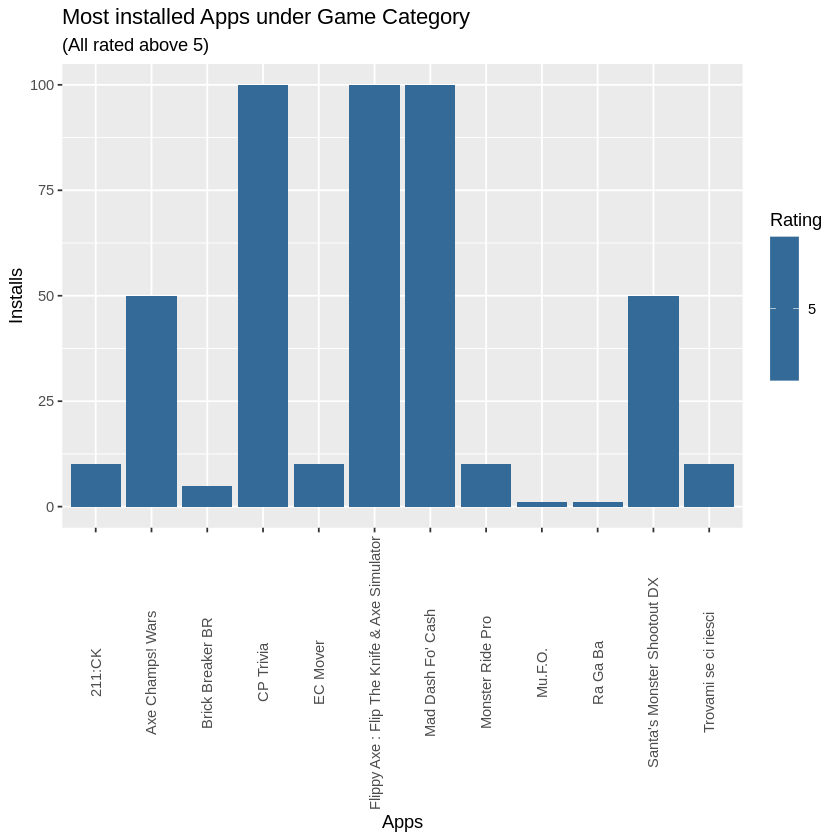

In [ ]:
gp1<- subset(gpdata, Category=="GAME", select = c(App, Installs, Rating))
gp1<-top_n(gp1, 10)
ggplot(gp1, aes(x=App, y=Installs, fill=Rating))+geom_bar(stat="identity")+ 
theme(axis.text.x = element_text(angle = 90, vjust=0.5))+ 
labs(title="Most installed Apps under Game Category",subtitle="(All rated above 5)",x="Apps",y="Installs",fill="Rating")


In [ ]:
dfcat <- subset(gpdata, !is.na(Rating))
dfcat <- dfcat%>%
  group_by(Category)%>%
  summarise(Rating = mean(as.numeric(Rating)))


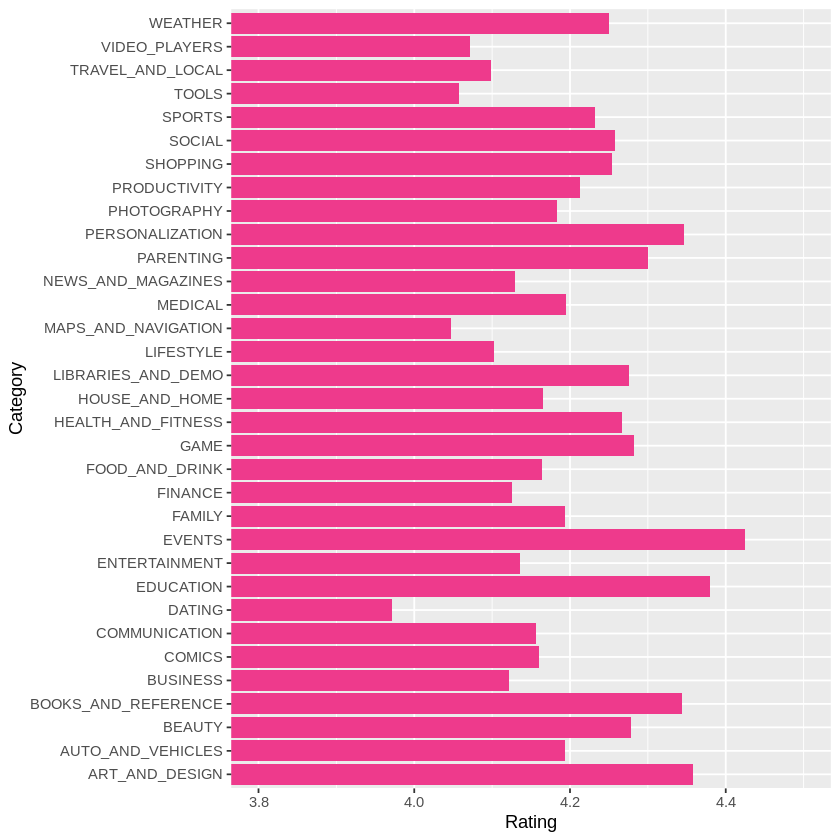

In [ ]:
ggplot(aes(x = Category, y = Rating), data = dfcat)+
  geom_bar(stat="identity", fill = 'violetred2')+
  coord_flip(ylim = c(3.8,4.5))

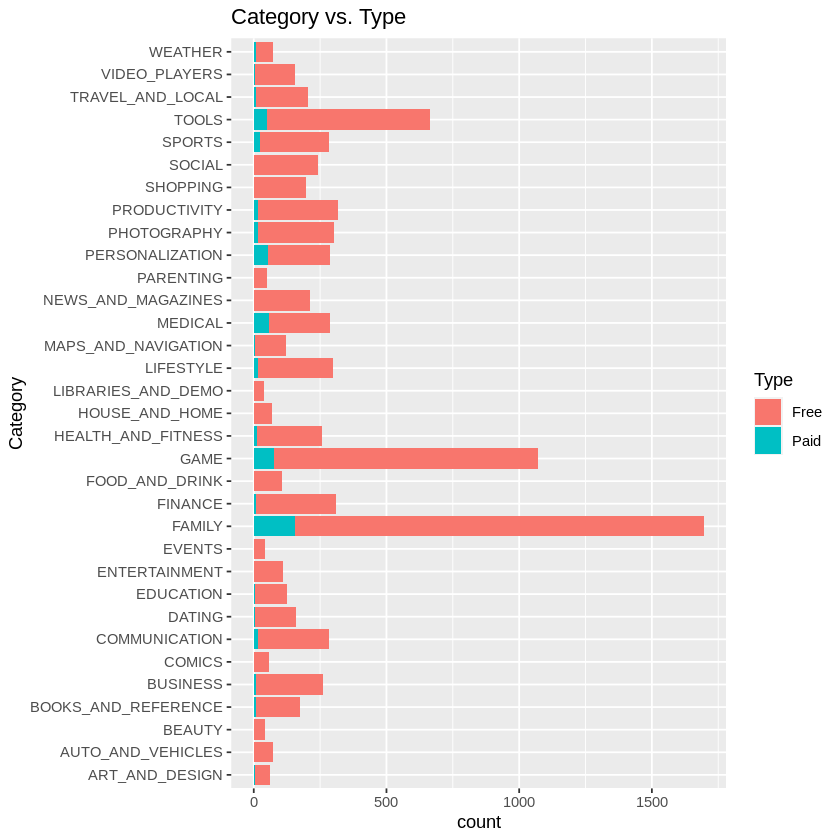

In [ ]:
ggplot(aes(x= Category), data = gpdata)+
  geom_bar(aes(fill = Type))+
  coord_flip()+
  ggtitle('Category vs. Type')

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


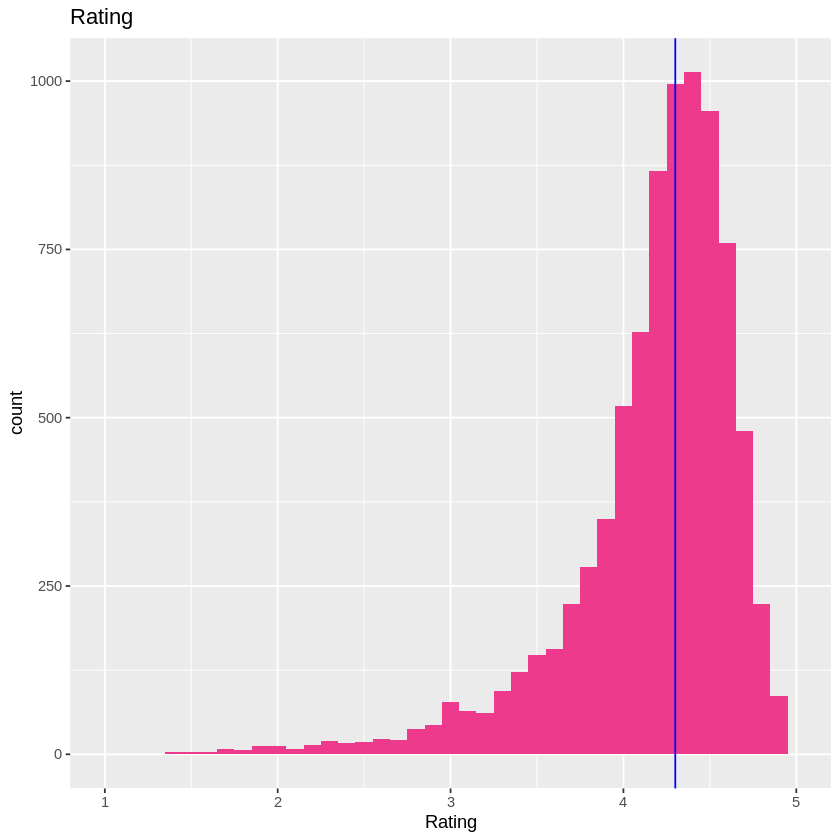

In [ ]:
med = median(subset(gpdata$Rating, gpdata$Rating >= 0.01))

#Histogram
ggplot(aes(x = Rating), data = gpdata)+
  geom_histogram(binwidth = 0.1, fill = 'violetred2')+
  xlim(1,5)+ 
  geom_vline(xintercept = med, col = 'blue')+
  ggtitle('Rating')

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1416 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1416 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 1416 rows containing missing values (geom_point).”


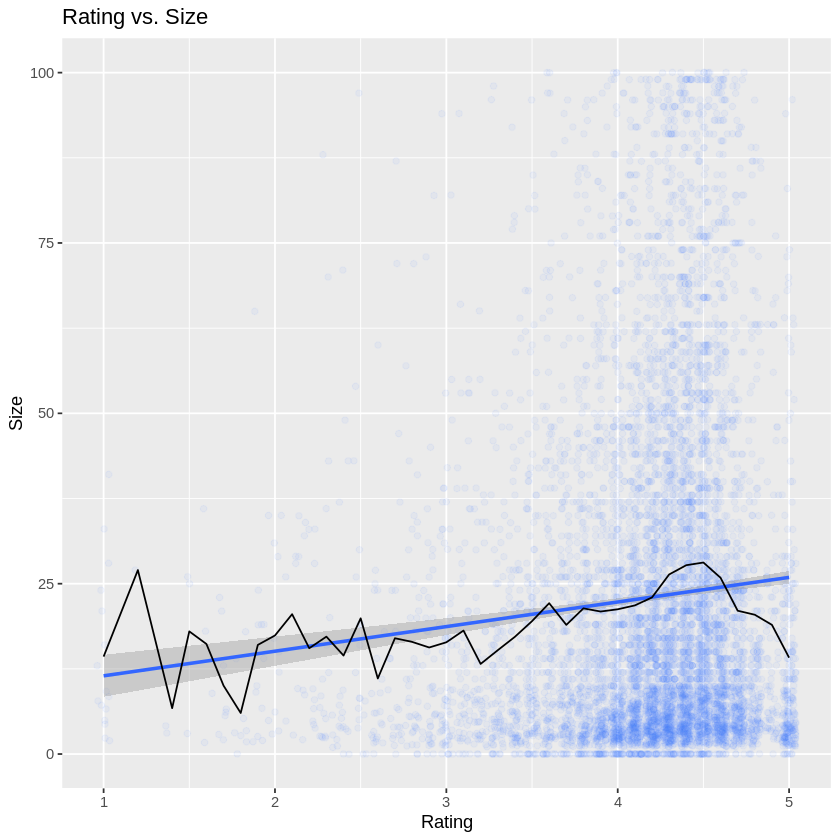

In [ ]:
df_size = subset(data.clean, Size != 'Varies with device')
ggplot(aes(x =Rating , y =Size ), data = df_size)+
  geom_jitter(alpha = 0.05, color ='royalblue1')+
  geom_smooth(method = 'lm')+
  geom_line(stat = 'summary', fun= mean  )+
  ggtitle('Rating vs. Size')

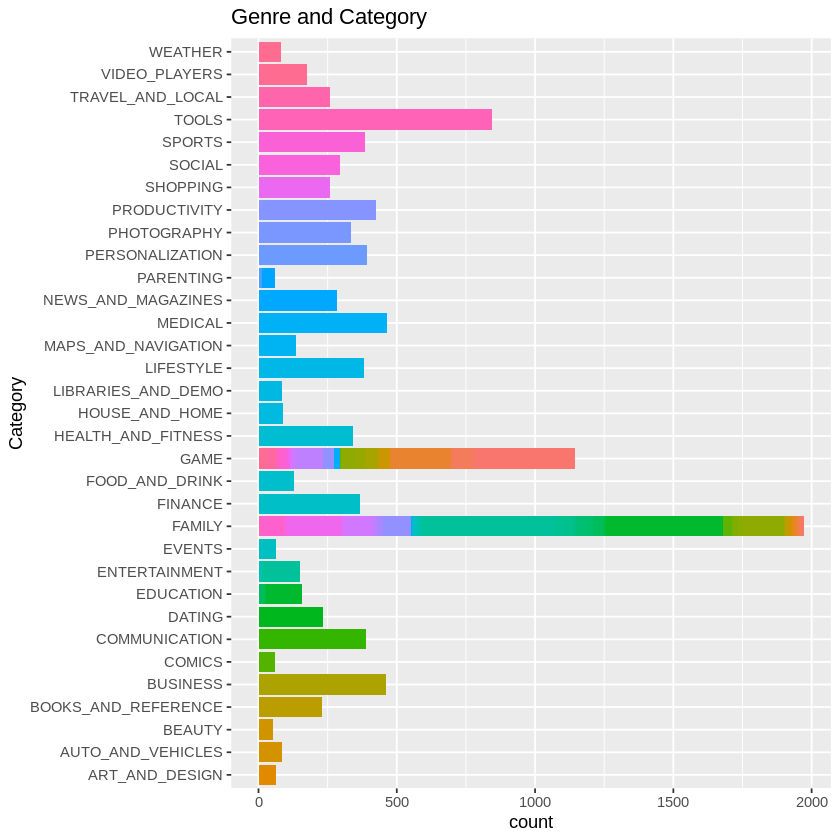

In [ ]:
ggplot(aes(x = Category), data =data.clean)+
  geom_bar(aes(fill = Genres))+
  coord_flip()+
  theme(legend.position="none")+
  ggtitle('Genre and Category')

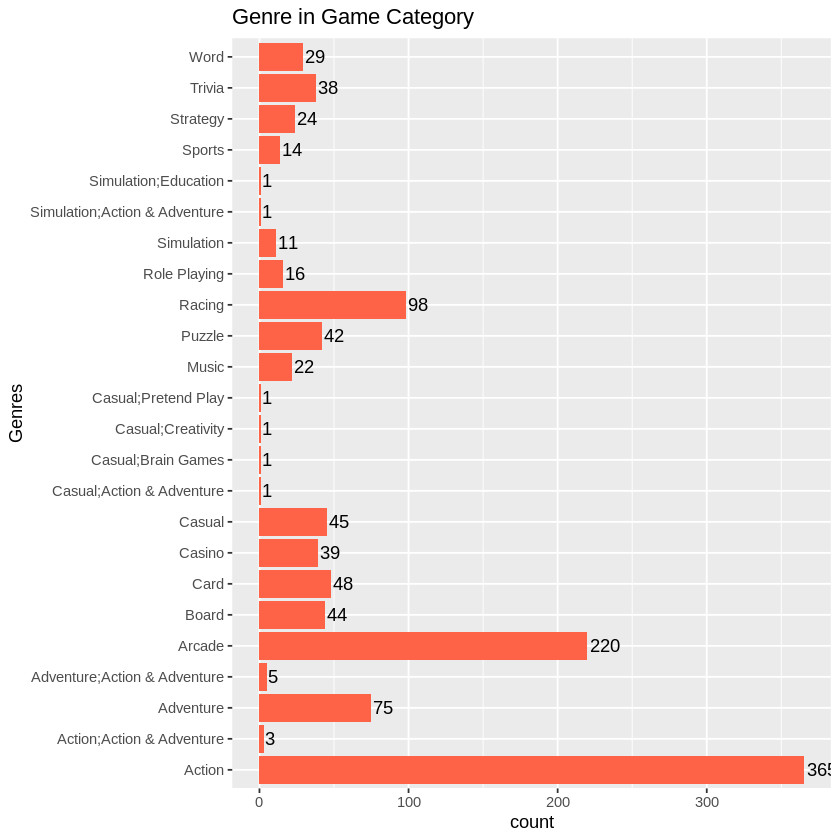

In [ ]:
temp <- subset(data.clean, Category == 'GAME')%>%
  group_by(Genres)%>%
  summarise(n = n())

#plot
ggplot(aes( x = Genres, y = n), data = temp)+
  geom_bar(stat = 'identity', fill = 'tomato')+
  coord_flip()+
  geom_text(aes(label = n), hjust = -0.1)+
  ggtitle("Genre in Game Category")+
  ylab('count')

THANK YOU